In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rfm = pd.read_excel('/content/drive/MyDrive/Project_github/RFM/sale_data.xlsx')
rfm.columns
rfm.head(5)

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642.0,Toys,2007-04-01 07:00:00,3.0,90.246230,1.0
1,Store 15,Customer 169,90945.0,Movies,2005-02-15 07:00:00,2.0,60.586312,2.0
2,Store 12,Customer 124,18548.0,Movies,2007-09-26 07:00:00,5.0,96.612695,3.0
3,Store 05,Customer 1988,85359.0,Books,2005-05-07 07:00:00,5.0,16.962671,4.0
4,Store 01,Customer 475,80069.0,Clothing,2008-01-06 07:00:00,5.0,65.215310,5.0


In [ ]:
#Ch data
table = pd.DataFrame({
    'Unique':rfm.nunique(),
    'Null':rfm.isnull().sum(),
    'Duplicated':rfm.duplicated().sum(),
    'Types':rfm.dtypes.values })




In [ ]:
#ลบ time portion เพราะต้องการแค่วันที่
rfm["date"] = pd.to_datetime(rfm["date"])
rfm["date"] = rfm["date"].dt.date
rfm["date"] = pd.to_datetime(rfm["date"])


In [ ]:
# Generate Monetary attribute from amount*singleprice
rfm["Monetary"] = rfm["amount"] * rfm["single_price"]

In [ ]:
#หาวันล่าสุดใน attribute date
latest_date = rfm["date"].max()
date_now = datetime.strptime("2008-12-31", "%Y-%m-%d")
#Generate Recent from date diff
rfm["Recent"] = date_now - rfm["date"]
#แก้ type time delta
rfm['Recent'] = rfm['Recent'].dt.days




In [ ]:
rfm['Recent']

0        640
1       1415
2        462
3       1334
4        360
        ... 
9995     631
9996     493
9997    1144
9998     749
9999     605
Name: Recent, Length: 10000, dtype: int64

In [ ]:
rfm = rfm.groupby('customer_id').agg({'Monetary': 'sum', 'Recent': 'min', 'customer_id': 'count'})




In [ ]:
rfm = rfm.rename(columns={'customer_id': 'Frequency'}) #เปลี่ยนชื่อ customer_id เป็น Frequency

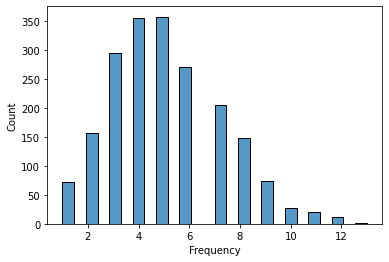

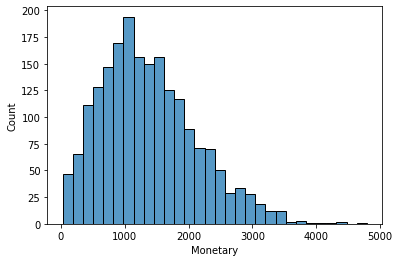

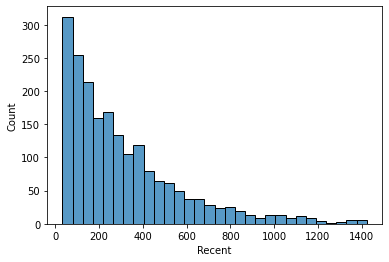

In [ ]:
col = ['Frequency','Monetary','Recent']

for i in col:
 sns.histplot(x=i,data=rfm)
 plt.show()

In [ ]:
df = rfm.copy()

In [ ]:
for i in col:
 df[i] = pd.qcut(df[i], q=5, labels=False)+1

df['Recent'] = 6 - df['Recent']



In [ ]:
value_counts = pd.concat([df[col[i]].value_counts() for i in range(len(col))], axis=1)
value_counts 


,Frequency,Monetary,Recent
1,524,398,398
2,355,398,398
3,357,398,398
4,474,398,397
5,280,398,399


In [ ]:
for i in col:
 df[i] = df[i].astype(str)
# Concatenate the columns into a new column
df['RFM_Score'] = df['Frequency'] + df['Monetary'] + df['Recent']


In [ ]:
df

,Monetary,Recent,Frequency,RFM_Score
customer_id,,,,
Customer 1,1,1,1,111
Customer 10,3,2,1,132
Customer 100,5,5,4,455
Customer 1000,2,4,1,124
Customer 1001,5,5,5,555
...,...,...,...,...
Customer 995,3,3,1,133
Customer 996,1,2,1,112
Customer 997,4,5,4,445
